In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold

np.set_printoptions(precision=11,suppress=True)

In [36]:
train_raw_data = pd.read_csv('train_data.csv')
test_raw_data = pd.read_csv('test_features.csv')
print(f'train rows : {len(train_raw_data)},train columns : {len(train_raw_data.columns)},test rows : {len(test_raw_data)},test columns : {len(test_raw_data.columns)}')
label=train_raw_data.loc[:,'poi']
train_raw_data = train_raw_data.drop(columns = ['poi'])

train rows : 113,train columns : 22,test rows : 33,test columns : 21


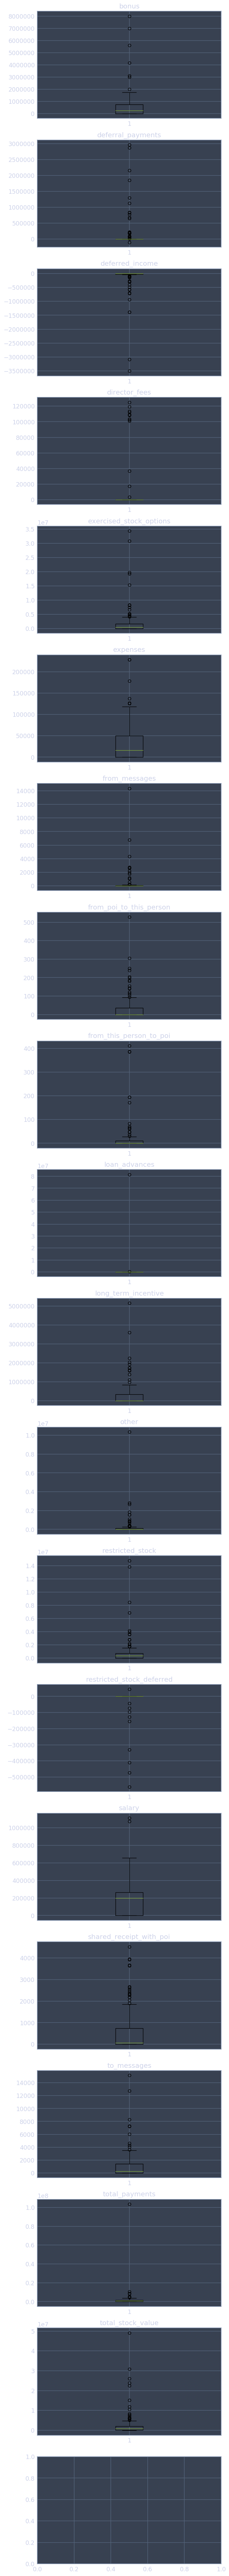

In [37]:
temp=train_raw_data.drop(columns = ['name','email_address'])
temp=temp.fillna(0)
# nrows = 10
# ncols = 2
# plt.figure(figsize=(20,50))
fig, axes = plt.subplots(figsize=(7, 100),nrows=20, ncols=1, sharex=False, sharey=False, dpi=100)
for i,col in zip(range(len(temp.columns)),temp.columns):
    s=axes[i]
    s.boxplot(temp[col])
    s.set_title(col)
#     plt.subplot(nrows, ncols, i+1)
#     plt.boxplot(temp[col])
#     plt.title(col)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


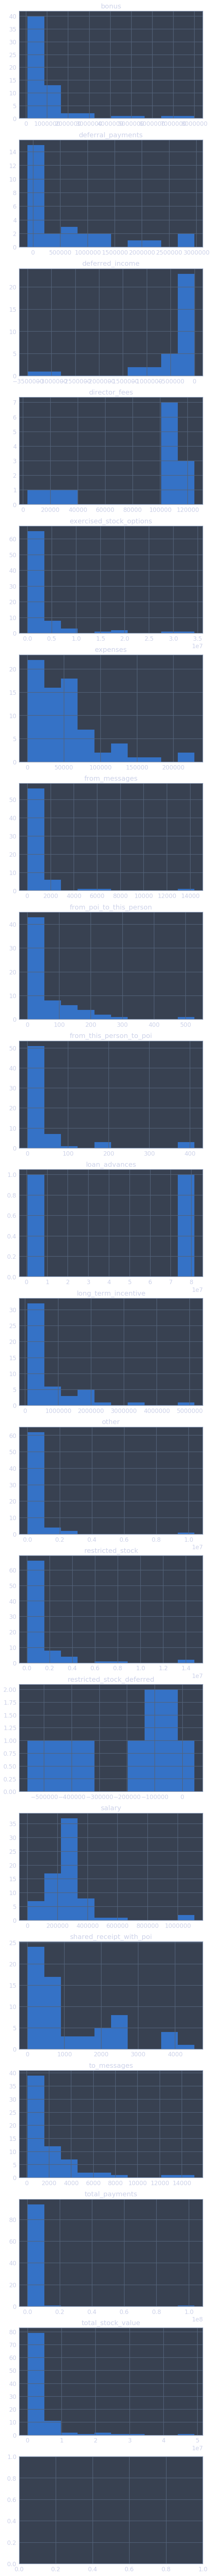

In [38]:
temp=train_raw_data.drop(columns = ['name','email_address'])
fig, axes = plt.subplots(figsize=(7, 100),nrows=20, ncols=1, sharex=False, sharey=False, dpi=100)
for i,col in zip(range(len(temp.columns)),temp.columns):
    s=axes[i]
    s.hist(temp[col])
    s.set_title(col)
#     plt.subplot(nrows, ncols, i+1)
#     plt.boxplot(temp[col])
#     plt.title(col)
plt.show()

---

### 1e : fill0+gdbt&lr

In [39]:
pre_process_data = pd.concat([train_raw_data,test_raw_data])
pre_process_data_1 = pre_process_data.drop(columns = ['name','email_address'])
pre_process_data_1 = pre_process_data_1.fillna(0)
x_train, x_valid, y_train, y_valid = train_test_split(pre_process_data_1[:len(label)], label, test_size=0.2)
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_valid)
print(f'valid score logistic:{accuracy_score(y_pred,y_valid)}')
gdbtclf = GradientBoostingClassifier()
gdbtclf.fit(x_train,y_train)
y_pred = gdbtclf.predict(x_valid)
print(f'valid score of GradientBoostingClassifier:{accuracy_score(y_pred,y_valid)}')

valid score logistic:0.7391304347826086
valid score of GradientBoostingClassifier:0.8260869565217391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
y_pred = gdbtclf.predict(pre_process_data_1[len(label):])
y_pred_prob = gdbtclf.predict_proba(pre_process_data_1[len(label):])
print(f'{y_pred}\n{y_pred_prob[:,1]}')
submission=pd.DataFrame({'name':test_raw_data['name'],'poi':pd.Series(y_pred_prob[:,1])})
submission.to_csv('submission_1e.csv',index=False)

[False False False False  True False  True False False False False False
 False False  True False False False False False  True False False False
 False False False False False False False False  True]
[0.08694792048 0.41275002789 0.4508535509  0.00050571492 0.53139323299
 0.00339152324 0.99441291402 0.00018939064 0.00361303863 0.00058525097
 0.01988008265 0.00011572072 0.00061251884 0.0001384463  0.98572121808
 0.00011572072 0.00072748387 0.00111930596 0.00029497876 0.00011572072
 0.99933119839 0.31293969986 0.00009501939 0.00028822808 0.0001454695
 0.00013456286 0.00010823561 0.00015621215 0.0042989586  0.00358850712
 0.00036914529 0.00058359764 0.68335682799]


---

### 2e fill0+std+gdbt&lr

In [41]:
pre_process_data = pd.concat([train_raw_data,test_raw_data])
pre_process_data_2 = pre_process_data.drop(columns = ['name','email_address'])
pre_process_data_2 = pre_process_data_2.fillna(0)
std = StandardScaler()
pre_process_data_2 = std.fit_transform(pre_process_data_2)
x_train, x_valid, y_train, y_valid = train_test_split(pre_process_data_2[:len(label)], label, test_size=0.2)
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_valid)
print(f'valid score logistic:{accuracy_score(y_pred,y_valid)}')
gdbtclf = GradientBoostingClassifier()
gdbtclf.fit(x_train,y_train)
y_pred = gdbtclf.predict(x_valid)
print(f'valid score of GradientBoostingClassifier:{accuracy_score(y_pred,y_valid)}')

valid score logistic:0.9130434782608695
valid score of GradientBoostingClassifier:0.9130434782608695


In [42]:
y_pred = gdbtclf.predict(pre_process_data_2[len(label):])
y_pred_prob = gdbtclf.predict_proba(pre_process_data_2[len(label):])
print(f'{y_pred}\n{y_pred_prob[:,1]}')
submission=pd.DataFrame({'name':test_raw_data['name'],'poi':pd.Series(y_pred_prob[:,1])})
submission.to_csv('submission_2e.csv',index=False)

[False  True  True False  True  True  True False False False False False
 False False False False False  True False False  True  True False False
 False False False False False False False False False]
[0.20561676936 0.72091219365 0.88784587293 0.00166992076 0.69445596595
 0.9964239859  0.97209787475 0.00028278339 0.00356108868 0.0003972857
 0.00022263548 0.00013275782 0.0003500259  0.00028278339 0.49395488452
 0.00013275782 0.00175845675 0.61292978827 0.02982875192 0.00013275782
 0.98778910321 0.80799128447 0.00306963578 0.00015946756 0.00037410042
 0.00063260083 0.00029294075 0.0003980042  0.19465444699 0.02112705015
 0.00015709288 0.00260948661 0.19471670176]


In [43]:
y_pred = lr.predict(pre_process_data_2[len(label):])
y_pred_prob = lr.predict_proba(pre_process_data_2[len(label):])
print(f'{y_pred}\n{y_pred_prob[:,1]}')
submission=pd.DataFrame({'name':test_raw_data['name'],'poi':pd.Series(y_pred_prob[:,1])})
submission.to_csv('submission_3e.csv',index=False)

[ True False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False]
[0.62567259864 0.28500944058 0.38903798959 0.04310856603 0.21327975618
 0.14984348267 0.81520227904 0.05570348513 0.31009823975 0.09593179306
 0.04183975645 0.09615901411 0.1138828421  0.06756910379 0.18629501273
 0.07429693034 0.10493471678 0.10341218857 0.10278483943 0.07190373911
 1.            0.21956313784 0.14506897912 0.07666966564 0.08772836877
 0.10106413279 0.14878350578 0.08197587897 0.15251106282 0.1815129088
 0.07451443108 0.09612948188 0.29679826571]


---

### 3e

In [45]:
pre_process_data = pd.concat([train_raw_data,test_raw_data])
pre_process_data_3 = pre_process_data.drop(columns = ['name','email_address'])
pre_process_data_3 = pre_process_data_3.fillna(0)
print('before logip:',pre_process_data_3.isnull().any())
temp=pre_process_data_3.drop(columns = ['expenses','restricted_stock_deferred']).apply(lambda x:np.log1p(x))
temp.head()
pre_process_data_3=pd.concat([temp,
                             pre_process_data_3.loc[:,
                            ['expenses','restricted_stock_deferred']]],
                            axis=1)
pre_process_data_3.isnull().any()
# std = StandardScaler()
# pre_process_data_3 = std.fit_transform(pre_process_data_3)
# x_train, x_valid, y_train, y_valid = train_test_split(pre_process_data_3[:len(label)], label, test_size=0.2)
# lr = LogisticRegression()
# lr.fit(x_train,y_train)
# y_pred = lr.predict(x_valid)
# print(f'valid score logistic:{accuracy_score(y_pred,y_valid)}')
# gdbtclf = GradientBoostingClassifier()
# gdbtclf.fit(x_train,y_train)
# y_pred = gdbtclf.predict(x_valid)
# print(f'valid score of GradientBoostingClassifier:{accuracy_score(y_pred,y_valid)}')

before logip: bonus                        False
deferral_payments            False
deferred_income              False
director_fees                False
exercised_stock_options      False
expenses                     False
from_messages                False
from_poi_to_this_person      False
from_this_person_to_poi      False
loan_advances                False
long_term_incentive          False
other                        False
restricted_stock             False
restricted_stock_deferred    False
salary                       False
shared_receipt_with_poi      False
to_messages                  False
total_payments               False
total_stock_value            False
dtype: bool


bonus                        False
deferral_payments             True
deferred_income               True
director_fees                False
exercised_stock_options      False
from_messages                False
from_poi_to_this_person      False
from_this_person_to_poi      False
loan_advances                False
long_term_incentive          False
other                        False
restricted_stock              True
salary                       False
shared_receipt_with_poi      False
to_messages                  False
total_payments               False
total_stock_value             True
expenses                     False
restricted_stock_deferred    False
dtype: bool

,expenses,restricted_stock_deferred
0,46950.0,0.0
1,29336.0,0.0
2,22884.0,0.0
3,118134.0,0.0
4,35818.0,0.0
...,...,...
28,38559.0,0.0
29,0.0,0.0
30,0.0,0.0
31,57727.0,0.0
